In [6]:
import pandas as pd

# Correct file path for local Desktop
file_path = "/Users/esther/Desktop/footballproject.xlsx"
print(f"File path: {file_path}")

# Load the file, using the first row as the header
data = pd.read_excel(file_path, engine='openpyxl', header=1)

# Show the first few rows to check
print(data.head())

# Clean column names by removing unwanted characters or spaces
data.columns = data.columns.str.strip()

# Drop rows where 'Player name' is missing (these rows are likely irrelevant)
data = data.dropna(subset=['Player name'])

# Convert the 'Transfer Fee' column to numeric (handle errors if needed)
data['Transfer Fee'] = pd.to_numeric(data['Transfer Fee'], errors='coerce')

# Show the cleaned data
print(data.head())
print(data.info())  # Check for missing values and data types


File path: /Users/esther/Desktop/footballproject.xlsx
       Player name        Current Club  Transfer Fee Transfer Date  \
0   Dominic Solanke         Tottenham           64.3  Aug 10, 2024   
1        Pedro Neto            Chelsea          60.0   Aug 11,2024   
2        Joao Felix            Chelsea          52.0  Aug 21, 2024   
3  Georginio Rutter           Brighton          46.7  Aug 19, 2024   
4    Joshua Zirkzee  Manchester United          42.5  Jul 14, 2024   

  Goals Scored  Assists made   Unnamed: 6 Position  Fouls Committed  \
0            2            1.0       617.0  Forward             14.0   
1            0            2.0       378.0  Forward              4.0   
2            1            0.0       122.0  Forward              1.0   
3            2            2.0       448.0  Forward             13.0   
4            1            1.0       411.0  Forward              3.0   

   Matches Started  Age at Transfer                  League    Mean   Median  \
0              7.0

In [7]:
# Fill missing values in columns with numeric data (e.g., using the median for transfer fee, etc.)
data['Transfer Fee'] = data['Transfer Fee'].fillna(data['Transfer Fee'].median())

# Drop rows where 'Player name' is missing (important column)
data = data.dropna(subset=['Player name'])

# Optionally, for other columns, you could use mean/median or fill with a specific value
# data['Goals Scored'] = data['Goals Scored'].fillna(data['Goals Scored'].median())


In [8]:
# Convert 'Goals Scored' column to numeric (handle any non-numeric gracefully)
data['Goals Scored'] = pd.to_numeric(data['Goals Scored'], errors='coerce')


In [9]:
# Summary statistics for numerical columns (Transfer Fee, Goals Scored, etc.)
print(data.describe())

# Show more info about the dataset, including nulls
print(data.info())


       Transfer Fee  Goals Scored  Assists made  Unnamed: 6  Fouls Committed  \
count     21.000000     20.000000     20.000000   20.000000        20.000000   
mean      32.364286      1.000000      0.600000  356.200000         5.100000   
std       13.640997      1.256562      0.753937  211.417422         4.865561   
min       17.600000      0.000000      0.000000    5.000000         0.000000   
25%       23.400000      0.000000      0.000000  196.500000         1.750000   
50%       29.300000      1.000000      0.000000  406.000000         4.000000   
75%       37.000000      2.000000      1.000000  451.500000         7.250000   
max       64.300000      5.000000      2.000000  704.000000        17.000000   

       Matches Started  Age at Transfer     Mean  Median  Standard deviation  
count         20.00000        20.000000   1.0000     1.0            1.000000  
mean           3.50000        22.600000  32.5175    29.3           13.976816  
std            2.66557         3.015748   

In [10]:
# Sort by Transfer Fee and show top 5 expensive transfers
top_expensive_transfers = data.sort_values(by='Transfer Fee', ascending=False).head(5)
print(top_expensive_transfers[['Player name', 'Transfer Fee']])


        Player name  Transfer Fee
0   Dominic Solanke          64.3
1        Pedro Neto          60.0
2        Joao Felix          52.0
3  Georginio Rutter          46.7
4    Joshua Zirkzee          42.5


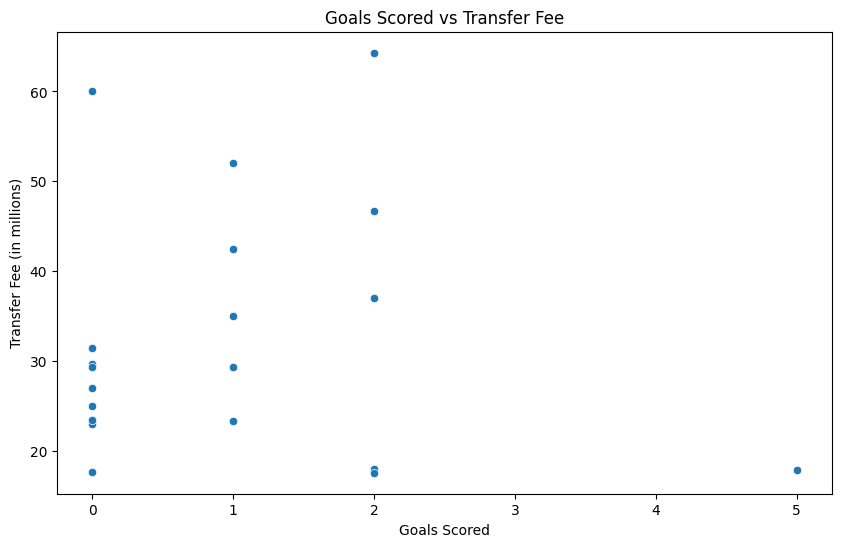

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Goals Scored vs Transfer Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Goals Scored', y='Transfer Fee')
plt.title('Goals Scored vs Transfer Fee')
plt.xlabel('Goals Scored')
plt.ylabel('Transfer Fee (in millions)')
plt.show()


In [12]:
# Average transfer fee by club
avg_transfer_fee_by_club = data.groupby('Current Club')['Transfer Fee'].mean().sort_values(ascending=False)
print(avg_transfer_fee_by_club)


Current Club
Chelsea              56.000000
Tottenham            46.800000
Manchester United    42.500000
Brighton             37.733333
Bournemouth          30.200000
Crystal Palace       29.700000
West Ham             26.433333
Manchester City      25.000000
Ipswich              19.683333
Everton              18.000000
Southampton          17.600000
Name: Transfer Fee, dtype: float64


In [13]:
# Count of each position
position_counts = data['Position'].value_counts().head(5)
print(position_counts)


Position
Forward                12
Mid-Fielder             3
Forward(FW - MF AM)     3
Forward(MF)             2
Name: count, dtype: int64


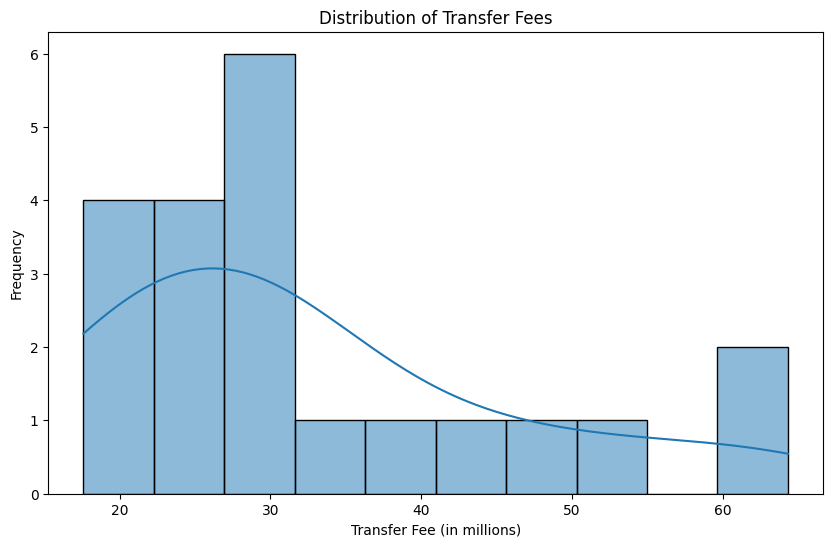

In [14]:
# Histogram of Transfer Fees
plt.figure(figsize=(10, 6))
sns.histplot(data['Transfer Fee'], bins=10, kde=True)
plt.title('Distribution of Transfer Fees')
plt.xlabel('Transfer Fee (in millions)')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Save the cleaned data to a new Excel file
cleaned_file_path = "/Users/esther/Desktop/cleaned_footballproject.xlsx"
data.to_excel(cleaned_file_path, index=False, engine='openpyxl')
print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to /Users/esther/Desktop/cleaned_footballproject.xlsx


In [17]:
print(data.columns)


Index(['Player name', 'Current Club', 'Transfer Fee', 'Transfer Date',
       'Goals Scored', 'Assists made', 'Unnamed: 6', 'Position',
       'Fouls Committed', 'Matches Started', 'Age at Transfer', 'League',
       'Mean', 'Median', 'Standard deviation'],
      dtype='object')


In [18]:
print(data.head())


        Player name       Current Club  Transfer Fee Transfer Date  \
0   Dominic Solanke         Tottenham           64.3  Aug 10, 2024   
1        Pedro Neto            Chelsea          60.0   Aug 11,2024   
2        Joao Felix            Chelsea          52.0  Aug 21, 2024   
3  Georginio Rutter           Brighton          46.7  Aug 19, 2024   
4    Joshua Zirkzee  Manchester United          42.5  Jul 14, 2024   

   Goals Scored  Assists made  Unnamed: 6 Position  Fouls Committed  \
0           2.0           1.0       617.0  Forward             14.0   
1           0.0           2.0       378.0  Forward              4.0   
2           1.0           0.0       122.0  Forward              1.0   
3           2.0           2.0       448.0  Forward             13.0   
4           1.0           1.0       411.0  Forward              3.0   

   Matches Started  Age at Transfer                  League     Mean  Median  \
0              7.0             26.0  English Premier League  32.5175    

In [19]:
data.rename(columns={'Incorrect Name': 'Assists Made'}, inplace=True)


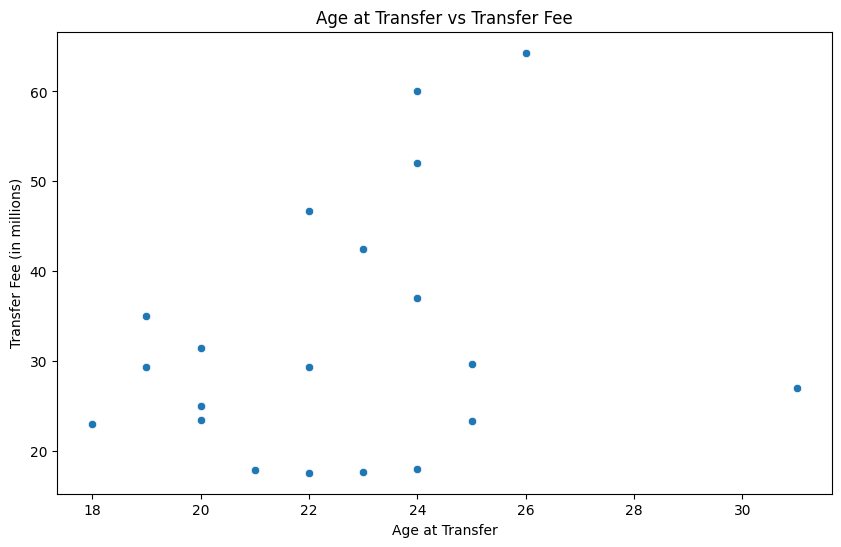

In [20]:
# Scatter plot for Age at Transfer vs Transfer Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age at Transfer', y='Transfer Fee')
plt.title('Age at Transfer vs Transfer Fee')
plt.xlabel('Age at Transfer')
plt.ylabel('Transfer Fee (in millions)')
plt.show()


In [22]:
print(high_fee.columns)


Index(['Player name', 'Current Club', 'Transfer Fee', 'Transfer Date',
       'Goals Scored', 'Assists made', 'Unnamed: 6', 'Position',
       'Fouls Committed', 'Matches Started', 'Age at Transfer', 'League',
       'Mean', 'Median', 'Standard deviation'],
      dtype='object')


In [29]:
# Rename the 'Unnamed: 6' column to 'Minutes Played' in the entire dataset before creating high_fee and low_fee
data.columns = data.columns.str.strip()  # Remove any extra spaces
data.rename(columns={'Unnamed: 6': 'Minutes Played'}, inplace=True)

# Now create high_fee and low_fee DataFrames
high_fee = data[data['Transfer Fee'] > 50]  # Players with transfer fees above 50 million
low_fee = data[data['Transfer Fee'] <= 50]  # Players with transfer fees 50 million or lower

# Ensure the 'Minutes Played' column is now present
assert 'Minutes Played' in high_fee.columns, "Column 'Minutes Played' not found in high_fee DataFrame"
assert 'Minutes Played' in low_fee.columns, "Column 'Minutes Played' not found in low_fee DataFrame"

# Now, perform the analysis
high_fee_performance = high_fee[['Goals Scored', 'Assists made', 'Minutes Played', 'Matches Started']].mean()
low_fee_performance = low_fee[['Goals Scored', 'Assists made', 'Minutes Played', 'Matches Started']].mean()

# Display the comparison
print("\nHigh Fee Players Performance:")
print(high_fee_performance)

print("\nLow Fee Players Performance:")
print(low_fee_performance)



High Fee Players Performance:
Goals Scored         1.000000
Assists made         1.000000
Minutes Played     372.333333
Matches Started      3.666667
dtype: float64

Low Fee Players Performance:
Goals Scored         1.000000
Assists made         0.529412
Minutes Played     353.352941
Matches Started      3.470588
dtype: float64


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
print(data.columns)


Index(['Player name', 'Current Club', 'Transfer Fee', 'Transfer Date',
       'Goals Scored', 'Assists made', 'Minutes Played', 'Position',
       'Fouls Committed', 'Matches Started', 'Age at Transfer', 'League',
       'Mean', 'Median', 'Standard deviation'],
      dtype='object')


In [35]:
# Calculate correlation matrix for selected columns
correlation_matrix = data[['Transfer Fee', 'Goals Scored', 'Assists made', 'Minutes Played', 'Matches Started']].corr()

# Display the correlation matrix
print(correlation_matrix)


                 Transfer Fee  Goals Scored  Assists made  Minutes Played  \
Transfer Fee         1.000000     -0.035062      0.397522        0.024078   
Goals Scored        -0.035062      1.000000     -0.166667        0.518670   
Assists made         0.397522     -0.166667      1.000000        0.313883   
Minutes Played       0.024078      0.518670      0.313883        1.000000   
Matches Started     -0.016846      0.534258      0.078567        0.918896   

                 Matches Started  
Transfer Fee           -0.016846  
Goals Scored            0.534258  
Assists made            0.078567  
Minutes Played          0.918896  
Matches Started         1.000000  


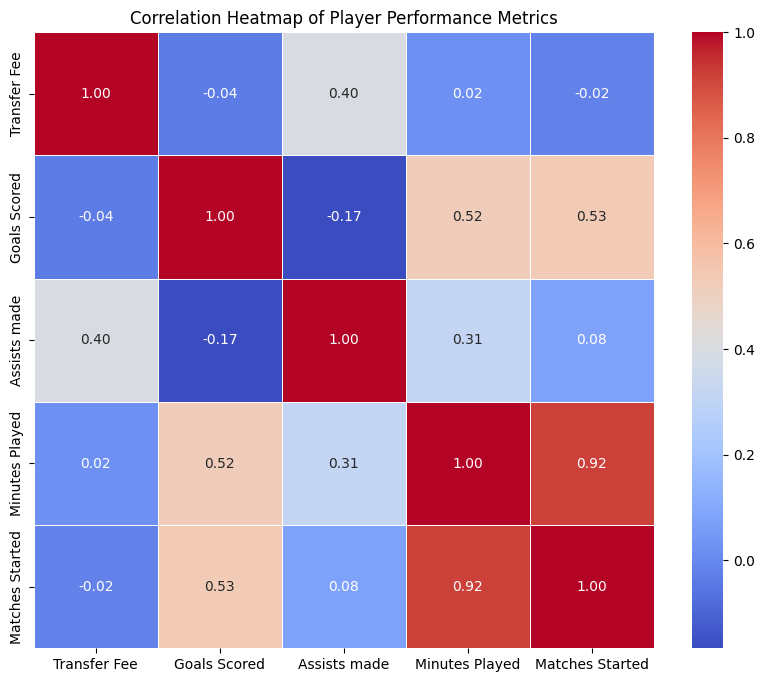

In [36]:
# Set up the plot size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title the plot
plt.title('Correlation Heatmap of Player Performance Metrics')

# Show the plot
plt.show()


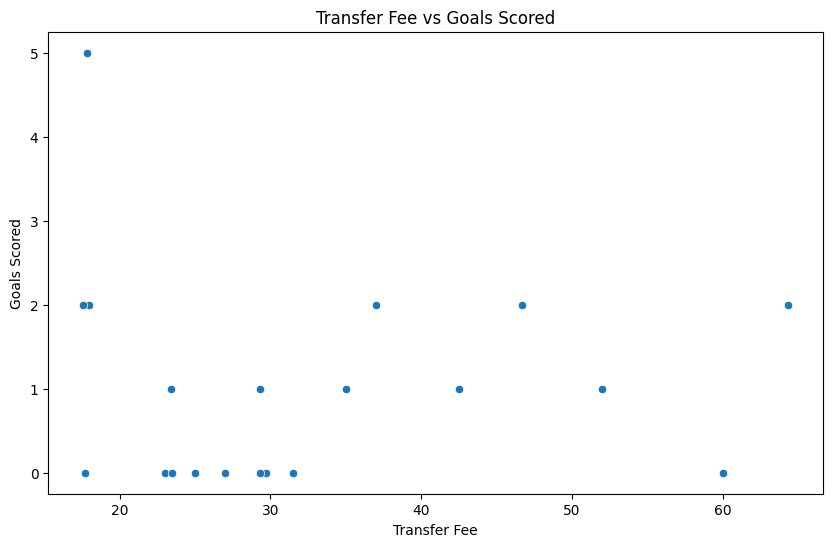

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Transfer Fee vs Goals Scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Transfer Fee'], y=data['Goals Scored'])
plt.title('Transfer Fee vs Goals Scored')
plt.xlabel('Transfer Fee')
plt.ylabel('Goals Scored')
plt.show()


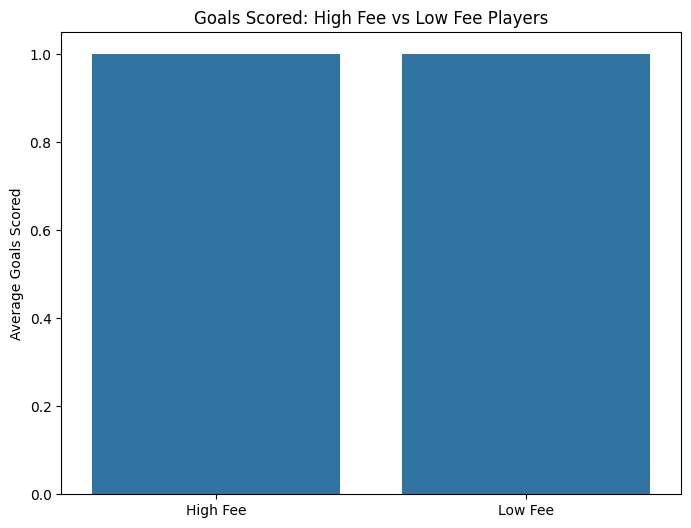

In [38]:
# Example: Plot comparing high-fee and low-fee players' Goals Scored
high_fee_players = data[data['Transfer Fee'] > data['Transfer Fee'].median()]
low_fee_players = data[data['Transfer Fee'] <= data['Transfer Fee'].median()]

# Compare Goals Scored for high and low fee players
plt.figure(figsize=(8, 6))
sns.barplot(x=["High Fee", "Low Fee"], y=[high_fee_players['Goals Scored'].mean(), low_fee_players['Goals Scored'].mean()])
plt.title('Goals Scored: High Fee vs Low Fee Players')
plt.ylabel('Average Goals Scored')
plt.show()


In [39]:
# Calculate ROI as Goals Scored per Transfer Fee
data['ROI'] = data['Goals Scored'] / data['Transfer Fee']

# Display the ROI for each player
data[['Player name', 'Transfer Fee', 'Goals Scored', 'ROI']].sort_values(by='ROI', ascending=False).head(10)


,Player name,Transfer Fee,Goals Scored,ROI
17,Liam Delap,17.85,5.0,0.280112
19,Cameron Archer,17.60,2.0,0.113636
16,Iliman Ndiaye,18.00,2.0,0.111111
7,Evanilson,37.00,2.0,0.054054
3,Georginio Rutter,46.70,2.0,0.042827
15,Luis Sinisterra,23.40,1.0,0.042735
10,Crysencio Summerville,29.30,1.0,0.034130
0,Dominic Solanke,64.30,2.0,0.031104
5,Yankuba Minteh,35.00,1.0,0.028571
4,Joshua Zirkzee,42.50,1.0,0.023529


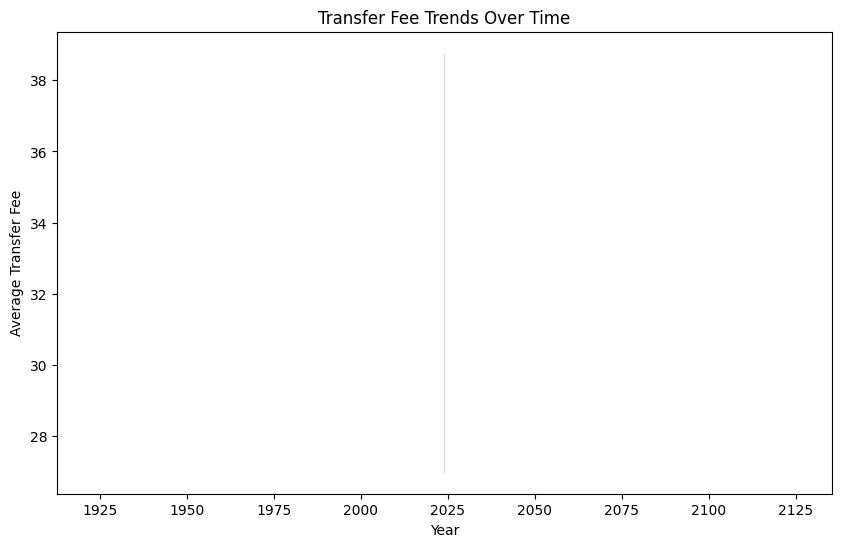

In [42]:
# Remove any spaces around the comma in the 'Transfer Date' column
data['Transfer Date'] = data['Transfer Date'].str.replace(r'\s*,\s*', ',', regex=True)

# Now, convert 'Transfer Date' to datetime format using the correct format
data['Transfer Date'] = pd.to_datetime(data['Transfer Date'], format='%b %d,%Y')

# Extract the year from the 'Transfer Date' column
data['Year'] = data['Transfer Date'].dt.year

# Plot the trend of transfer fees over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Transfer Fee', data=data)
plt.title('Transfer Fee Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Transfer Fee')
plt.show()


In [43]:
# Calculate the correlation matrix for relevant columns
performance_columns = ['Transfer Fee', 'Goals Scored', 'Assists made', 'Minutes Played', 'Matches Started']
correlation_matrix = data[performance_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                 Transfer Fee  Goals Scored  Assists made  Minutes Played  \
Transfer Fee         1.000000     -0.035062      0.397522        0.024078   
Goals Scored        -0.035062      1.000000     -0.166667        0.518670   
Assists made         0.397522     -0.166667      1.000000        0.313883   
Minutes Played       0.024078      0.518670      0.313883        1.000000   
Matches Started     -0.016846      0.534258      0.078567        0.918896   

                 Matches Started  
Transfer Fee           -0.016846  
Goals Scored            0.534258  
Assists made            0.078567  
Minutes Played          0.918896  
Matches Started         1.000000  


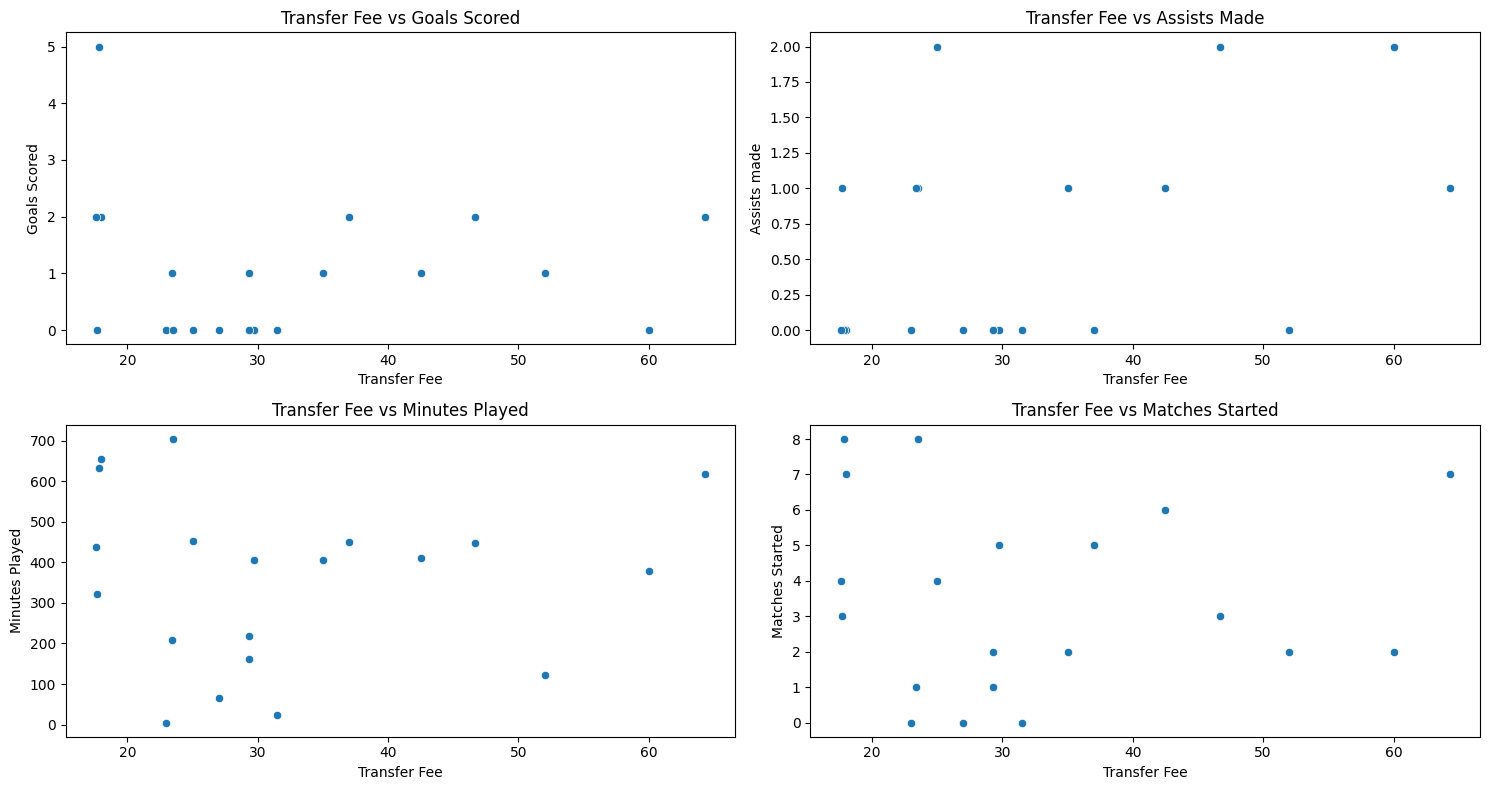

In [44]:
# Plot scatter plots to visualize correlations
plt.figure(figsize=(15, 8))

# Scatter plot: Transfer Fee vs Goals Scored
plt.subplot(2, 2, 1)
sns.scatterplot(x='Transfer Fee', y='Goals Scored', data=data)
plt.title('Transfer Fee vs Goals Scored')

# Scatter plot: Transfer Fee vs Assists Made
plt.subplot(2, 2, 2)
sns.scatterplot(x='Transfer Fee', y='Assists made', data=data)
plt.title('Transfer Fee vs Assists Made')

# Scatter plot: Transfer Fee vs Minutes Played
plt.subplot(2, 2, 3)
sns.scatterplot(x='Transfer Fee', y='Minutes Played', data=data)
plt.title('Transfer Fee vs Minutes Played')

# Scatter plot: Transfer Fee vs Matches Started
plt.subplot(2, 2, 4)
sns.scatterplot(x='Transfer Fee', y='Matches Started', data=data)
plt.title('Transfer Fee vs Matches Started')

plt.tight_layout()
plt.show()


In [48]:
# Create a new column for ROI calculation based on goals scored
data['ROI_Goals'] = data['Goals Scored'] / data['Transfer Fee']

# Create a new column for ROI based on assists made
data['ROI_Assists'] = data['Assists made'] / data['Transfer Fee']

# Create a new column for ROI based on minutes played
data['ROI_Minutes'] = data['Minutes Played'] / data['Transfer Fee']

# Calculate average ROI for each Current Club
current_club_roi = data.groupby('Current Club')[['ROI_Goals', 'ROI_Assists', 'ROI_Minutes']].mean()

# Display the top Current clubs with best ROI based on Goals Scored, Assists, and Minutes Played
top_roi_current_clubs = current_club_roi.sort_values(by='ROI_Goals', ascending=False).head(10)
print(top_roi_current_clubs)


                   ROI_Goals  ROI_Assists  ROI_Minutes
Current Club                                          
Southampton         0.113636     0.000000    24.829545
Everton             0.111111     0.000000    36.388889
Ipswich             0.093371     0.033017    27.833067
Bournemouth         0.048395     0.021368    10.539039
Brighton            0.023799     0.023799     7.307769
Manchester United   0.023529     0.023529     9.670588
Tottenham           0.015552     0.007776     7.562328
West Ham            0.011377     0.000000     3.378746
Chelsea             0.009615     0.016667     4.323077
Crystal Palace      0.000000     0.000000    13.670034


In [52]:
print(X_train.shape)
print(y_train.shape)


(16, 1)
(16,)


In [53]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Transfer Fee    0
dtype: int64
1


In [55]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]


In [56]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', depending on your data
X_train_imputed = imputer.fit_transform(X_train)


In [57]:
print(X_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in target


ROI_Goals      1
ROI_Assists    1
ROI_Minutes    1
dtype: int64
0


In [58]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)  # Use the imputed data or cleaned data


LinearRegression()

In [59]:
print(X_train.isnull().sum())  # This will show the number of missing values for each feature.


ROI_Goals      1
ROI_Assists    1
ROI_Minutes    1
dtype: int64


In [60]:
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)  # If you dropped rows
# OR
model.fit(X_train_imputed, y_train)  # If you filled missing values


LinearRegression()

In [64]:
# Generate placeholder column names like 'Feature0', 'Feature1', etc.
column_names = [f'Feature{i}' for i in range(X_train_clean.shape[1])]

# Convert X_train_clean and X_test to DataFrame with the generated column names
X_train_clean = pd.DataFrame(X_train_clean, columns=column_names)
X_test_clean = pd.DataFrame(X_test, columns=column_names)


In [66]:
# Generate placeholder column names like 'Feature0', 'Feature1', etc.
column_names = [f'Feature{i}' for i in range(X_train_clean.shape[1])]

# Convert X_train_clean and X_test to DataFrame with the generated column names
X_train_clean = pd.DataFrame(X_train_clean, columns=column_names)
X_test_clean = pd.DataFrame(X_test, columns=column_names)


In [68]:
print(X_train_clean.shape)  # Shape of X_train_clean
print(y_train_clean.shape)  # Shape of y_train_clean


(15, 3)
(15,)


In [69]:
print(y_train_clean.head())  # Check first few values
print(y_train_clean.shape)   # Should be a 1D array or series


5     35.0
11    29.3
3     46.7
18    17.7
16    18.0
Name: Transfer Fee, dtype: float64
(15,)


In [70]:
y_train_clean = y_train_clean.squeeze()  # Convert DataFrame to Series


In [71]:
print(X_train_clean.isnull().sum())  # Check for missing values in features
print(y_train_clean.isnull().sum())  # Check for missing values in target


Feature0    15
Feature1    15
Feature2    15
dtype: int64
0


In [72]:
X_train_clean = X_train_clean.dropna()  # Remove rows with missing values in features
y_train_clean = y_train_clean.dropna()  # Remove corresponding target rows


In [73]:
print(X_train_clean.dtypes)  # Check the data types of the columns in X_train_clean


Feature0    float64
Feature1    float64
Feature2    float64
dtype: object


In [75]:
print(X_train_clean.shape)  # Check the number of rows and columns in the features
print(y_train_clean.shape)  # Check the number of rows in the target variable


(0, 3)
(15,)


In [76]:
print(X_train_clean.isnull().sum())  # Check for missing values in each feature
print(y_train_clean.isnull().sum())  # Check for missing values in the target variable


Feature0    0
Feature1    0
Feature2    0
dtype: int64
0


In [79]:
# Drop rows where either X_train_clean or y_train_clean has missing values
df_train_clean = pd.concat([X_train_clean, y_train_clean], axis=1)  # Combine features and target
df_train_clean = df_train_clean.dropna()  # Drop rows with any NaN values

# Separate the features and target again
X_train_clean = df_train_clean.drop(columns=y_train_clean.name)  # Assuming y_train_clean has a name
y_train_clean = df_train_clean[y_train_clean.name]

# Check the shape after cleaning
print(X_train_clean.shape)
print(y_train_clean.shape)


(0, 3)
(0,)


In [80]:
# Check for missing values in both features and target
print("Missing values in X_train_clean:")
print(X_train_clean.isnull().sum())

print("\nMissing values in y_train_clean:")
print(y_train_clean.isnull().sum())


Missing values in X_train_clean:
Feature0    0
Feature1    0
Feature2    0
dtype: int64

Missing values in y_train_clean:
0


In [81]:
# Check the shapes before training
print(f"Shape of X_train_clean: {X_train_clean.shape}")
print(f"Shape of y_train_clean: {y_train_clean.shape}")


Shape of X_train_clean: (0, 3)
Shape of y_train_clean: (0,)


In [83]:
print(f"Original Shape of X_train: {X_train.shape}")
print(f"Original Shape of y_train: {y_train.shape}")


Original Shape of X_train: (16, 3)
Original Shape of y_train: (16,)


In [84]:
print(f"Missing values in X_train:\n{X_train.isnull().sum()}")
print(f"Missing values in y_train:\n{y_train.isnull().sum()}")


Missing values in X_train:
ROI_Goals      1
ROI_Assists    1
ROI_Minutes    1
dtype: int64
Missing values in y_train:
0


In [85]:
# Fill missing values with mean for each column in X_train
X_train_filled = X_train.fillna(X_train.mean())


In [86]:
# Drop rows with missing values from X_train
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Make sure y_train matches the dropped rows in X_train


In [87]:
print(f"Shape of X_train_clean: {X_train_clean.shape}")
print(f"Shape of y_train_clean: {y_train_clean.shape}")


Shape of X_train_clean: (15, 3)
Shape of y_train_clean: (15,)


In [88]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model on the cleaned data
model.fit(X_train_clean, y_train_clean)


LinearRegression()

In [90]:
# Rename the columns of X_test_clean to match X_train_clean
X_test_clean.columns = X_train_clean.columns


In [92]:
# Drop rows with missing values in X_test_clean
X_test_clean = X_test_clean.dropna()


In [94]:
# Check for missing values in X_test_clean
print(X_test_clean.isnull().sum())


ROI_Goals      0
ROI_Assists    0
ROI_Minutes    0
dtype: int64


In [96]:
print(X_test_clean.shape)


(0, 3)


In [97]:
print(X_test_clean.isnull().sum())


ROI_Goals      0
ROI_Assists    0
ROI_Minutes    0
dtype: int64


In [98]:
print("Before preprocessing:", X_test.shape)
# Apply preprocessing steps
print("After preprocessing:", X_test_clean.shape)


Before preprocessing: (5, 3)
After preprocessing: (0, 3)


In [99]:
print(X_test_clean.isnull().sum())


ROI_Goals      0
ROI_Assists    0
ROI_Minutes    0
dtype: int64


In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
X_test_clean = imputer.fit_transform(X_test)


In [101]:
# Instead of dropna(), try imputing
X_test_clean = imputer.fit_transform(X_test)


In [102]:
print("Original X_test shape:", X_test.shape)
print("X_test after preprocessing:", X_test_clean.shape)


Original X_test shape: (5, 3)
X_test after preprocessing: (5, 3)


In [104]:
import pandas as pd

X_test_clean = pd.DataFrame(X_test_clean, columns=X_train.columns)


In [105]:
print("X_train columns:", X_train.columns)
print("X_test_clean columns:", X_test_clean.columns)


X_train columns: Index(['ROI_Goals', 'ROI_Assists', 'ROI_Minutes'], dtype='object')
X_test_clean columns: Index(['ROI_Goals', 'ROI_Assists', 'ROI_Minutes'], dtype='object')


In [106]:
y_pred = model.predict(X_test_clean)


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test is the actual target values for testing
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 427.029467986776
R-squared: -0.168546614367852


In [108]:
correlations = X_train.corr()
correlations.to_csv('correlations.csv')


In [114]:
df = pd.read_excel('cleaned_footballproject.xlsx')


In [115]:
df.head()  # Shows the first 5 rows of the dataframe


,Player name,Current Club,Transfer Fee,Transfer Date,Goals Scored,Assists made,Minutes Played,Position,Fouls Committed,Matches Started,Age at Transfer,League,Mean,Median,Standard deviation
0,Dominic Solanke,Tottenham,64.3,"Aug 10, 2024",2.0,1.0,617.0,Forward,14.0,7.0,26.0,English Premier League,32.5175,29.3,13.976816
1,Pedro Neto,Chelsea,60.0,"Aug 11,2024",0.0,2.0,378.0,Forward,4.0,2.0,24.0,English Premier League,NaN,NaN,NaN
2,Joao Felix,Chelsea,52.0,"Aug 21, 2024",1.0,0.0,122.0,Forward,1.0,2.0,24.0,English Premier League,NaN,NaN,NaN
3,Georginio Rutter,Brighton,46.7,"Aug 19, 2024",2.0,2.0,448.0,Forward,13.0,3.0,22.0,English Premier League,NaN,NaN,NaN
4,Joshua Zirkzee,Manchester United,42.5,"Jul 14, 2024",1.0,1.0,411.0,Forward,3.0,6.0,23.0,English Premier League,NaN,NaN,NaN


In [116]:
df.describe()


,Transfer Fee,Goals Scored,Assists made,Minutes Played,Fouls Committed,Matches Started,Age at Transfer,Mean,Median,Standard deviation
count,21.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,1.0000,1.0,1.000000
mean,32.364286,1.000000,0.600000,356.200000,5.100000,3.50000,22.600000,32.5175,29.3,13.976816
std,13.640997,1.256562,0.753937,211.417422,4.865561,2.66557,3.015748,NaN,NaN,NaN
min,17.600000,0.000000,0.000000,5.000000,0.000000,0.00000,18.000000,32.5175,29.3,13.976816
25%,23.400000,0.000000,0.000000,196.500000,1.750000,1.75000,20.000000,32.5175,29.3,13.976816
50%,29.300000,1.000000,0.000000,406.000000,4.000000,3.00000,22.500000,32.5175,29.3,13.976816
75%,37.000000,2.000000,1.000000,451.500000,7.250000,5.25000,24.000000,32.5175,29.3,13.976816
max,64.300000,5.000000,2.000000,704.000000,17.000000,8.00000,31.000000,32.5175,29.3,13.976816


In [117]:
df.isnull().sum()  # This will show the number of missing values in each column


Player name            0
Current Club           1
Transfer Fee           0
Transfer Date          1
Goals Scored           1
Assists made           1
Minutes Played         1
Position               1
Fouls Committed        1
Matches Started        1
Age at Transfer        1
League                 1
Mean                  20
Median                20
Standard deviation    20
dtype: int64

In [118]:
df = df.dropna()  # Drops rows with missing values


In [120]:
df.to_excel('cleaned_data.xlsx', index=False)  # Save as Excel file
df.to_csv('cleaned_data.csv', index=False)  # Save as CSV file


In [121]:
# Save cleaned data to a CSV file
df.to_csv('cleaned_football_data.csv', index=False)

# Or, if you prefer to save it as an Excel file
df.to_excel('cleaned_football_data.xlsx', index=False)


In [122]:
import pandas as pd

# Assuming the file is now in the 'Football_Project' folder
df = pd.read_excel('Football_Project/cleaned_footballproject.xlsx')


In [125]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                    Transfer Fee  Goals Scored  Assists made  Minutes Played  \
Transfer Fee            1.000000     -0.035062      0.397522        0.024078   
Goals Scored           -0.035062      1.000000     -0.166667        0.518670   
Assists made            0.397522     -0.166667      1.000000        0.313883   
Minutes Played          0.024078      0.518670      0.313883        1.000000   
Fouls Committed         0.193612      0.766160      0.284082        0.719308   
Matches Started        -0.016846      0.534258      0.078567        0.918896   
Age at Transfer         0.250655      0.027778     -0.074074       -0.011755   
Mean                         NaN           NaN           NaN             NaN   
Median                       NaN           NaN           NaN             NaN   
Standard deviation           NaN           NaN           NaN             NaN   
ROI                    -0.306274      0.929818     -0.270381        0.465154   
Year                         NaN        

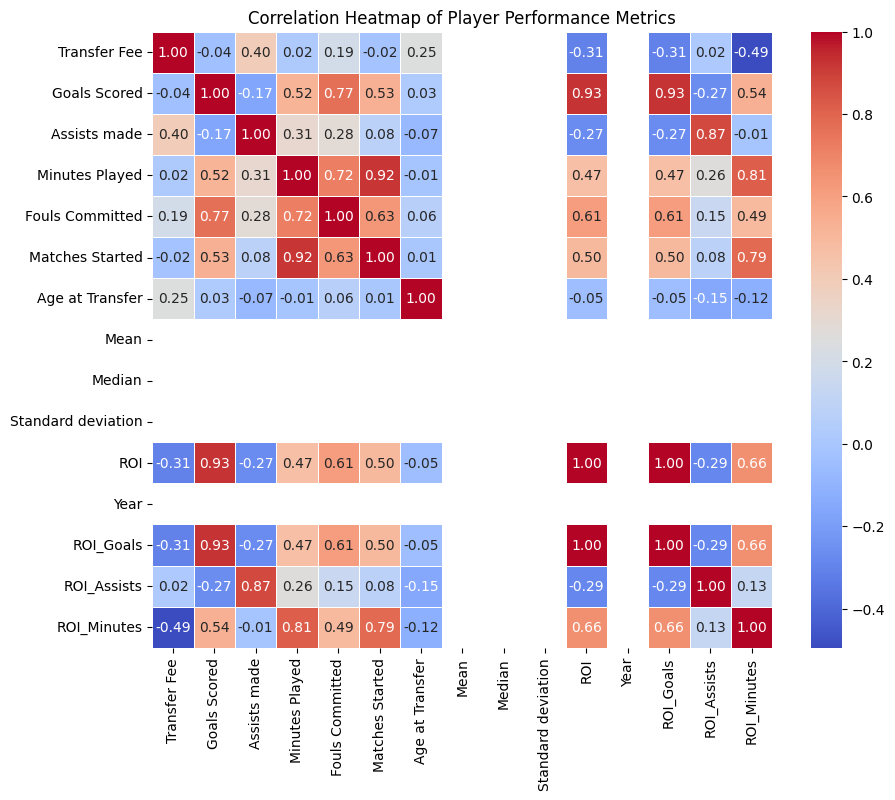

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title the plot
plt.title('Correlation Heatmap of Player Performance Metrics')

# Show the plot
plt.show()


In [129]:
# Check data types of all columns
print(X_train.dtypes)


Goals Scored                      float64
Assists made                      float64
Minutes Played                    float64
Position                           object
Fouls Committed                   float64
Matches Started                   float64
Age at Transfer                   float64
League                             object
Mean                              float64
Median                            float64
Standard deviation                float64
ROI                               float64
Year                              float64
ROI_Goals                         float64
ROI_Assists                       float64
ROI_Minutes                       float64
Current Club_Brighton                bool
Current Club_Chelsea                 bool
Current Club_Crystal Palace          bool
Current Club_Everton                 bool
Current Club_Ipswich                 bool
Current Club_Manchester City         bool
Current Club_Manchester United       bool
Current Club_Southampton          

In [130]:
X_train = pd.get_dummies(X_train, columns=['Position', 'League'])
X_test = pd.get_dummies(X_test, columns=['Position', 'League'])


In [131]:
print(X_train.dtypes)


Goals Scored                      float64
Assists made                      float64
Minutes Played                    float64
Fouls Committed                   float64
Matches Started                   float64
Age at Transfer                   float64
Mean                              float64
Median                            float64
Standard deviation                float64
ROI                               float64
Year                              float64
ROI_Goals                         float64
ROI_Assists                       float64
ROI_Minutes                       float64
Current Club_Brighton                bool
Current Club_Chelsea                 bool
Current Club_Crystal Palace          bool
Current Club_Everton                 bool
Current Club_Ipswich                 bool
Current Club_Manchester City         bool
Current Club_Manchester United       bool
Current Club_Southampton             bool
Current Club_Tottenham               bool
Current Club_West Ham             

In [133]:
print(X_train.columns)


Index(['Goals Scored', 'Assists made', 'Minutes Played', 'Fouls Committed',
       'Matches Started', 'Age at Transfer', 'Mean', 'Median',
       'Standard deviation', 'ROI', 'Year', 'ROI_Goals', 'ROI_Assists',
       'ROI_Minutes', 'Current Club_Brighton', 'Current Club_Chelsea',
       'Current Club_Crystal Palace', 'Current Club_Everton',
       'Current Club_Ipswich', 'Current Club_Manchester City',
       'Current Club_Manchester United', 'Current Club_Southampton',
       'Current Club_Tottenham ', 'Current Club_West Ham', 'Position_Forward',
       'Position_Forward(FW - MF AM)', 'Position_Forward(MF)',
       'Position_Mid-Fielder', 'League_English Premier League'],
      dtype='object')


In [134]:
# Check for missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Goals Scored                       1
Assists made                       1
Minutes Played                     1
Fouls Committed                    1
Matches Started                    1
Age at Transfer                    1
Mean                              16
Median                            16
Standard deviation                16
ROI                                1
Year                               1
ROI_Goals                          1
ROI_Assists                        1
ROI_Minutes                        1
Current Club_Brighton              0
Current Club_Chelsea               0
Current Club_Crystal Palace        0
Current Club_Everton               0
Current Club_Ipswich               0
Current Club_Manchester City       0
Current Club_Manchester United     0
Current Club_Southampton           0
Current Club_Tottenham             0
Current Club_West Ham              0
Position_Forward                   0
Position_Forward(FW - MF AM)       0
Position_Forward(MF)               0
P

In [135]:
# Check for missing values
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Goals Scored                       1
Assists made                       1
Minutes Played                     1
Fouls Committed                    1
Matches Started                    1
Age at Transfer                    1
Mean                              16
Median                            16
Standard deviation                16
ROI                                1
Year                               1
ROI_Goals                          1
ROI_Assists                        1
ROI_Minutes                        1
Current Club_Brighton              0
Current Club_Chelsea               0
Current Club_Crystal Palace        0
Current Club_Everton               0
Current Club_Ipswich               0
Current Club_Manchester City       0
Current Club_Manchester United     0
Current Club_Southampton           0
Current Club_Tottenham             0
Current Club_West Ham              0
Position_Forward                   0
Position_Forward(FW - MF AM)       0
Position_Forward(MF)               0
P

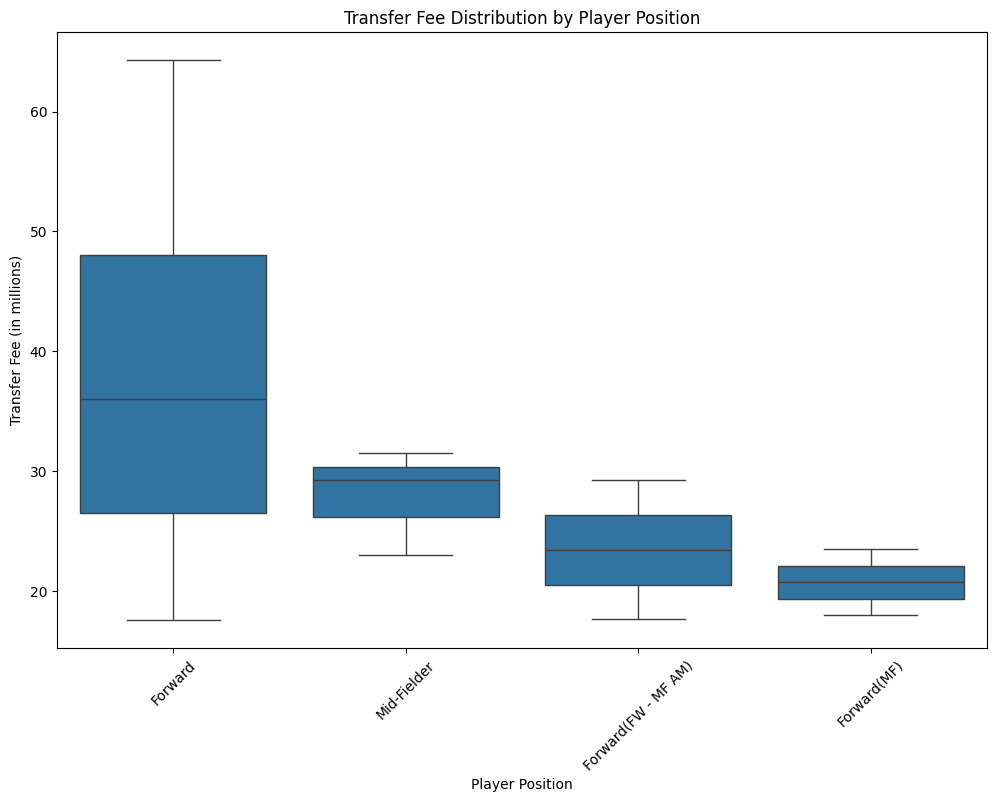

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data has a column 'Position' for player positions (e.g., Forward, Midfielder, Defender)
# Replace 'Position' with the actual column name from your dataset if it's different.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Transfer Fee', data=data)
plt.title('Transfer Fee Distribution by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Transfer Fee (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
Bar Plots Comparing Performance Metrics Between High and Low Fee Players

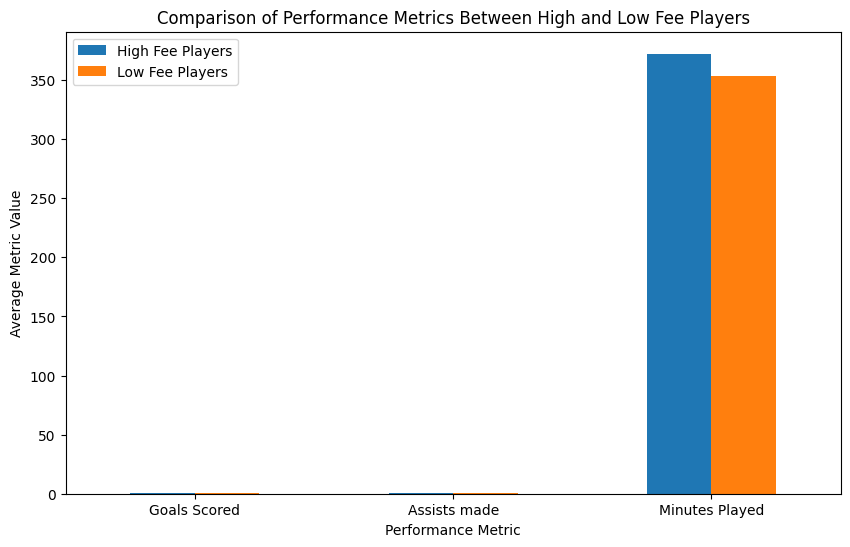

In [153]:
# Assuming 'high_fee' and 'low_fee' DataFrames are already defined as per your previous steps
# You can also add more performance metrics like 'Matches Started' if needed.

# Calculate the average performance metrics for high and low fee players
high_fee_performance = high_fee[['Goals Scored', 'Assists made', 'Minutes Played']].mean()
low_fee_performance = low_fee[['Goals Scored', 'Assists made', 'Minutes Played']].mean()

# Combine the results into a DataFrame for easier plotting
performance_comparison = pd.DataFrame({
    'High Fee Players': high_fee_performance,
    'Low Fee Players': low_fee_performance
})

# Plot the comparison as a bar plot
performance_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Performance Metrics Between High and Low Fee Players')
plt.ylabel('Average Metric Value')
plt.xlabel('Performance Metric')
plt.xticks(rotation=0)
plt.show()


In [154]:
import pandas as pd

# File path to the Excel file
file_path = "/Users/esther/Desktop/footballproject.xlsx"

# Load the Excel file with the correct header row
data = pd.read_excel(file_path, engine='openpyxl', header=1)

# Quick check to see the first few rows
print(data.head())


       Player name        Current Club  Transfer Fee Transfer Date  \
0   Dominic Solanke         Tottenham           64.3  Aug 10, 2024   
1        Pedro Neto            Chelsea          60.0   Aug 11,2024   
2        Joao Felix            Chelsea          52.0  Aug 21, 2024   
3  Georginio Rutter           Brighton          46.7  Aug 19, 2024   
4    Joshua Zirkzee  Manchester United          42.5  Jul 14, 2024   

  Goals Scored  Assists made   Minutes Played Position  Fouls Committed  \
0            2            1.0           617.0  Forward             14.0   
1            0            2.0           378.0  Forward              4.0   
2            1            0.0           122.0  Forward              1.0   
3            2            2.0           448.0  Forward             13.0   
4            1            1.0           411.0  Forward              3.0   

   Matches Started  Age at Transfer                  League    Mean   Median  \
0              7.0             26.0  English Pre

In [155]:
# Clean column names by removing extra spaces or unwanted characters
data.columns = data.columns.str.strip()


In [156]:
# Drop rows where 'Player name' is missing
data = data.dropna(subset=['Player name'])

# Convert 'Transfer Fee' to numeric and handle errors
data['Transfer Fee'] = pd.to_numeric(data['Transfer Fee'], errors='coerce')

# Fill missing 'Transfer Fee' values with the median
data['Transfer Fee'] = data['Transfer Fee'].fillna(data['Transfer Fee'].median())


In [157]:
# Convert 'Goals Scored' to numeric (handle errors gracefully)
data['Goals Scored'] = pd.to_numeric(data['Goals Scored'], errors='coerce')

# Fill missing 'Goals Scored' values with 0 (or median, depending on relevance)
data['Goals Scored'] = data['Goals Scored'].fillna(0)

# Check the dataset's info to confirm changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 31
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         21 non-null     object 
 1   Current Club        20 non-null     object 
 2   Transfer Fee        21 non-null     float64
 3   Transfer Date       20 non-null     object 
 4   Goals Scored        21 non-null     float64
 5   Assists made        20 non-null     float64
 6   Minutes Played      20 non-null     float64
 7   Position            20 non-null     object 
 8   Fouls Committed     20 non-null     float64
 9   Matches Started     20 non-null     float64
 10  Age at Transfer     20 non-null     float64
 11  League              20 non-null     object 
 12  Mean                1 non-null      float64
 13  Median              1 non-null      float64
 14  Standard deviation  1 non-null      float64
dtypes: float64(10), object(5)
memory usage: 2.6+ KB
None


In [159]:
# Define threshold for 'high fee' players
fee_threshold = data['Transfer Fee'].median()

# Split the dataset into high and low fee groups
high_fee = data[data['Transfer Fee'] > fee_threshold]
low_fee = data[data['Transfer Fee'] <= fee_threshold]

# Calculate average performance metrics for both groups
high_fee_metrics = high_fee[['Goals Scored', 'Assists made']].mean()
low_fee_metrics = low_fee[['Goals Scored', 'Assists made']].mean()

# Combine metrics into a single DataFrame for comparison
performance_comparison = pd.DataFrame({
    'High Fee Players': high_fee_metrics,
    'Low Fee Players': low_fee_metrics
})


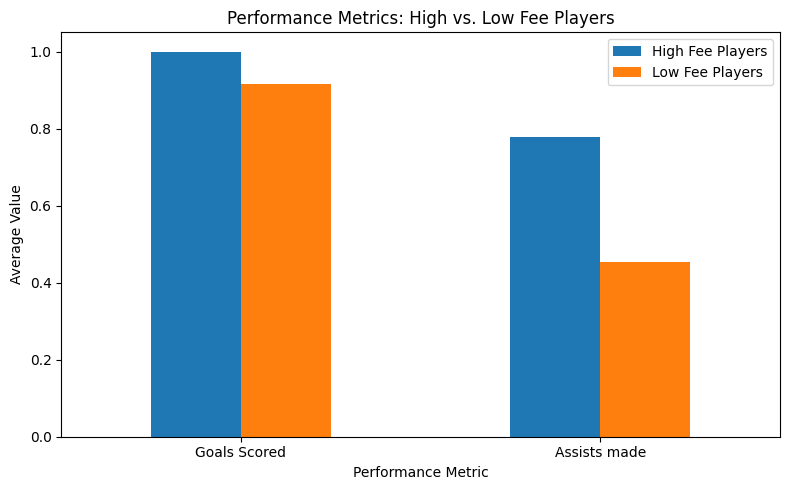

In [160]:
import matplotlib.pyplot as plt

# Plot bar chart comparing performance metrics
performance_comparison.plot(kind='bar', figsize=(8, 5))
plt.title('Performance Metrics: High vs. Low Fee Players')
plt.ylabel('Average Value')
plt.xlabel('Performance Metric')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
